# Decaimento Radioativo

- PET - Física UFRN
- Petiano: Bruno Ramos Galindo
- Data: 30/05/2025

$\quad$ O decaimento radioativo é um processo fundamental da Física Nuclear, responsável pela transformação espontânea de núcleos atômicos instáveis em núcleos mais estáveis, com a emissão de partículas e radiação. Entre os principais tipos de decaimento estão o alfa, beta e gama, cada um com suas próprias características. Neste breve `Notebook`, veremos a influência dos decaimentos na transmutação de um elemento em outro e faremos simulações acerca da evolução temporal dos elementos químicos.

Este `Notebook` está dividido nas seguintes seções:

- 1. Introdução
  - 1.1. Breve introdução teórica
  - 1.2. Breve teoria computacional do decaimento
- 2. Implementação de códigos
  - 2.1. Bismuto-213
  - 2.2. Carbono-14
  - 2.3. Molibdênio-99
  - 2.4. Urânio
- 3. Conclusão
- 4. Referências

## Pré-requisitos

$\quad$ Para melhor entendimento deste `Notebook`, recomenda-se que o leitor tenha uma noção básica de python. Além disso, ter um ambiente com bibliotecas e funções necessárias para o funcionamento do código. Para este `Notebook`, é de suma importância baixar as bibliotecas `pandas` e `radioactivedecay`, respectivamente nessa ordem, pois ter a biblioteca `pandas` é uma das condições para a performace da `radioactivedecay`.

## Importando bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import radioactivedecay as rd
from random import random

## Detalhes das bibliotecas

In [ ]:
%load_ext version_information
%version_information Numpy, Matplotlib, radioactivedecay, random

# 1. Introdução

## 1.1. Breve introdução teórica

$\quad$ O decaimento radioativo se trata de um processo natural que ocorre em átomos instáveis, onde ocorre uma liberação de partículas e/ou radiação a fim de torná-lo um átomo estável. Nesse processo ocorre a transmutação, ou em outras palavras, a conversão de um elemento em outro.

Existem vários tipos de decaimento, mas os principais são:

- Decaimento alfa: emissão de partículas alfa (composta por dois prótons e dois neutros), típico de núcleos pesados.

- Decaimento Beta: transformação de um nêutron em próton (ou vice-versa), com emissão de um elétron ou pósitron e um neutrino (ou antineutrino).

- Decaimento Gama: emissão de fótons de alta energia, ocorre geralmente após um decaimento alfa ou beta, quando o átomo continua instável para que o núcleo atinja um estado de menor energia.

$\quad$ A taxa de decaimento é descrita por uma constante característica de cada isotopo radioativo, e a quantidade de núcleos que permanecem sem decair ao longo do tempo segue uma lei exponencial, definida pela meia-vida, o tempo necessário para que metade dos núcleos radioativos de uma amostra desintegre. Para mais informações, recomendo ler o artigo **Uma Breve Introdução ao Decaimento Radioativo,** visitando a aba do **PET Artigos** no nosso site ou simplesmente [clicando aqui](https://drive.google.com/file/d/1JbcEs89eRMTUa35LFLtcIlYVqNT8yvwf/view).

## 1.2. Breve teoria computacional do decaimento

$\quad$ A biblioteca `radioactivedecay` calcula uma solução analítica para as equações diferenciais da cadeia de decaimento usando o método descrito por Amaku et al. **[3]**.

$\quad$ Considere um sistema de $n$ radionuclídeos, onde o vetor $N(t)$ possui elementos $N_i(t)$ que representam o número de átomos do radionuclídeo $i$ no instante $t$. As equações diferenciais da cadeia de decaimento radioativo podem ser expressas usando a notação matricial como:


$$\frac{dN}{dt} = ΛN \text{.}$$

$\quad$ $Λ$ é uma matriz triangular inferior cujos elementos são


$\lambda$ = \begin{cases}
0 & \text{se } i < j, \\
-\lambda_j & \text{se } i = j, \\
b_{ji}\lambda_j & \text{se } i > j.
\end{cases}


$\quad$ Onde $\lambda_j$ é a constante de decaimento do radionuclídeo $j$, e $b_{ji}$ é a fração de ramificação do radionuclídeo $j$ para $i$.

$\quad$ $\lambda$ é uma matriz diagonalizável, portanto sua autodecomposição pode ser usada para reescrever a equação diferencial da matriz como

$$\frac{dN}{dt} = C \lambda_d C^{-1}N.$$

$\quad$ Aqui $\lambda_d$ é uma matriz diagonal cujos elementos ao longo da diagonal são as constantes de decaimento negativas ($\lambda_{dii}$ = $-\lambda_i$, estes são os autovalores de $\lambda$). A matriz $C$ e sua inversa $C^{-1}$ são ambas matrizes triangulares inferiores. Os vetores coluna de $C$ são os autovetores de $\lambda$. Amaku et al. mostraram que os elementos de $C$ podem ser calculados como


$C_{ij}$ = \begin{cases}
0 & \text{se } i < j, \\
1 & \text{se } i = j, \\
\frac{∑_{k=j}^{i-1}\lambda_{ik}C_{kj}}{\lambda_{jj}-\lambda_{ii}} & \text{se } i > j.
\end{cases}


$\quad$ Os elementos da matriz $C^{-1}$ inversa
podem então ser calculados como


$C_{ij}$ = \begin{cases}
0 & \text{se } i < j, \\
1 & \text{se } i = j, \\
-∑_{k=j}^{i-1}C_{ik}C_{kj}^{-1} & \text{se } i > j.
\end{cases}


$\quad$ A solução analítica para a equação diferencial matricial dada a condição inicial $N(t = 0) = N(0)$ é

$$N(t) = Ce^{\lambda_d t}C^{-1}N(0).$$

$\quad$ Esta é a equação que é calculada por `radioactivedecay` a cada chamada para `decay()`. $e^{\lambda_d t}$ é a matriz exponencial de $\lambda_dt$
. É uma matriz diagonal com elementos $e_{ii}^{\lambda_d t}$ = $e^{-\lambda_it}$.

$\quad$ As equações finais necessárias servem para a conversão entre diversas grandezas. A conversão entre massa ($M$, em gramas) e número de átomos ($N$) utiliza o vetor de massas atômicas ($M_u$) e a constante de Avogadro ($N_a$):

$$M_i = \frac{M_{ui}N_i}{N_a}.$$

$\quad$ A conversão entre atividade ($A$) e número de átomos ($N$) usa o vetor de constantes de decaimento ($\lambda$):


$$A_i = \lambda_i N_i.$$

$\quad$ Essas informações são oriundas da documentação da biblioteca `radioactivedecay`. Para mais informações sobre a teoria vale a pena consultar
o site **[2]**.

## 2. Implementação dos códigos

$\quad$ Nesta seção vamos implementar códigos e observar o decaimento radioativo.

## 2.1. Bismuto-213

$\quad$ A seguir é criado um diagrama de cadeia de decaimento para o isotopo Bismuto-213, um nuclídeo radioativo que faz parte do decaimento do Actínio-227. A função `rd.Nuclide('Bi-213')` cria um objeto representando esse isótopo e a função `Bi213.plot()` para plotar o diagrama.

(<Figure size 450x1050 with 1 Axes>, <Axes: >)

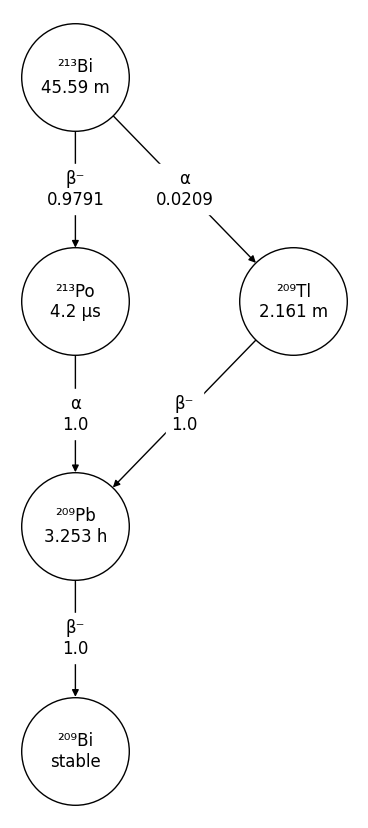

In [ ]:
Bi213 = rd.Nuclide('Bi-213')
Bi213.plot()

In [ ]:
NBi213 = 10000        #número de átomos de bismuto 213
NTl209 = 0            #número de átomos de tálio 209
NPb209 = 0            #número de átomos de chumbo 209
NBi209 = 0            #número de átomos de bismuto 209
tmax = 20000          #tempo total de simulação
h = 1

$\quad$ No bloco a seguir estamos criando listas para salvar os valores de cada decaimento.

In [ ]:
tpoints = np.arange(0,tmax,h)
Bi213 = []
Tl209 = []
Pb209 = []
Bi209 = []

$\quad$ No bloco abaixo, é feita uma função `P(tmv)` que calcula a probabilidade do átomo decair em um intervalo de tempo h, dada a meia-vida $\tau$ do isótopo. Essa expressão vem de:




$$ P = 1 - \left(\frac{1}{2}\right)^{\frac{h}{\tau}} = 1 - 2^{\frac{-h}{\tau}}$$

$\quad$ Essa fórmula é derivada da lei exponencial do decaimento **[1]**, adaptada para simulações passo a passo.

In [ ]:
mvBi = 46*60          #meia-vida Bi 213 em segundos
mvTl = 2.2*60         #meia-vida Tl 209 em segundos
mvPb = 3.3*60         #meia-vida Pb 209 em segundos

def P(tmv):           #função probabilidade-de-decaimento
    return 1 - 2**(-h/tmv)

In [ ]:
for t in tpoints:
    Bi213.append(NBi213)
    Tl209.append(NTl209)
    Pb209.append(NPb209)
    Bi209.append(NBi209)

    #decaimento de Pb 209

    decayPb = 0
    for i in range(NPb209):

        if random() < P(mvPb):
            decayPb += 1

    NPb209 -= decayPb
    NBi209 += decayPb

    #decaimento de Tl 209

    decayTl = 0
    for i in range(NTl209):
        if random() < P(mvTl):
            decayTl += 1

    NTl209 -= decayTl
    NPb209 += decayTl

    #decaimento de Bi 213

    decayBi = 0
    for i in range(NBi213):
        if random() < P(mvBi):
            decayBi += 1

    #probabilidade do Bi 213 decair para o Tl 209 ou Pb 209

    if random() < 2.09/100:
        NTl209 += decayBi
    else:
        NPb209 += decayBi

    NBi213 -= decayBi

$\quad$ O bloco de código acima está simulando, passo a passo, o decaimento radioativo de uma cadeia nuclear iniciada pelo Bismuto-213 (Bi-213). A cada passo de tempo (definido anteriormente), há uma atualização na quantidade de cada nuclídeo envolvido no processo de decaimento: Bi-213, Tl-209, Pb-209 e o produto final estável Bi-209.

$\quad$ Plotando o gráfico dos decaimentos realizados.

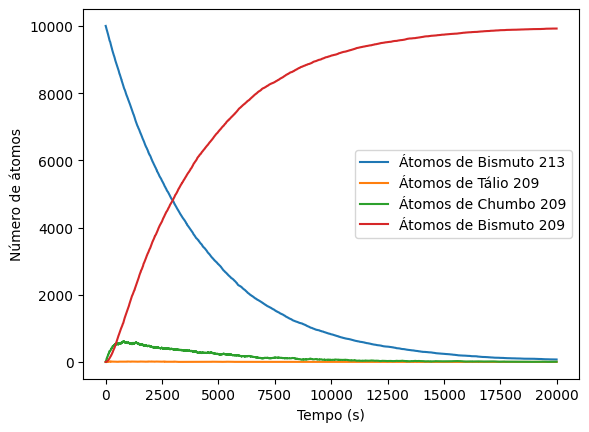

In [ ]:
plt.plot(tpoints,Bi213)
plt.plot(tpoints,Tl209)
plt.plot(tpoints,Pb209)
plt.plot(tpoints,Bi209)
plt.legend(["Átomos de Bismuto 213","Átomos de Tálio 209","Átomos de Chumbo 209","Átomos de Bismuto 209"])
plt.xlabel("Tempo (s)")
plt.ylabel("Número de átomos")
plt.show()

$\quad$ O gráfico permite visualizar de maneira clara o processo de decaimento: o desaparecimento progressivo dos núcleos instáveis e o aparecimento dos produtos de decaimento ao longo do tempo. Isso é de suma importância para o entendimento da sequência de transformações nucleares (transmutações) em uma cadeia de decaimento.

## 2.2. Carbono-14

$\quad$ Faremos novamente um diagrama de cadeia decaimento radioativo, mas agora para o Carbono-14.

(<Figure size 150x450 with 1 Axes>, <Axes: >)

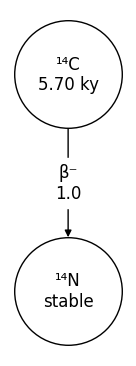

In [ ]:
C14 = rd.Nuclide('C-14')
C14.plot() # plotando o diagrama de cadeia de decaimento

$\quad$ A seguir, a função `rd.Inventory({'C-14': 3.2E24}, 'num')` cria um inventário radioativo com $3.2 \times 10^{24}$ núcleos de C-14. O segundo argumento `num` é aplicado para indicar que a quantidade dada foi em número de núcleos, e não em mols, e nem em massa. Em seguida, a função `C14_t0.decay(3000, 'y')` calcula a situação do inventário após 3000 anos de decaimento, o segundo argumento dessa função `y` indica que o tempo está em anos. A função `C14_t1.moles('mol')` converte os átomos restantes em mol. Isso é realizado utilizando a constante de Avogadro, onde:

$$1 mol = 6.22 \times 10^{23} atómos$$

$\quad$ Sendo assim:

In [ ]:
C14_t0 = rd.Inventory({'C-14': 3.2E24}, 'num')
C14_t1 = C14_t0.decay(3000, 'y')
C14_t1.moles('mol')
C14_t1.mole_fractions()

{np.str_('C-14'): np.float64(0.6943255713073281),
 np.str_('N-14'): np.float64(0.3056744286926719)}

$\quad$ A função `rd.Nuclide('C-14')` cria um objeto para o isótopo de carbono 14, permitindo acessar informações sobre ele tais como meia-vida, modo-decaimentos, produtos, etc. No caso, a função que usamos `nucc.half_life('readable')` está mostrando o valor do tempo de meia-vida do carbono 14. A função retorna um valor de 5.70ky (ou 5700y), que é um valor muito próximo do real, que é cerca de 5730y (anos).

In [ ]:
nucc = rd.Nuclide('C-14')
nucc.half_life('readable')

'5.70 ky'

$\quad$ Por fim, é plotado o gráfico do decaimento do carbono-14, mostrando sua evolução com o passar do tempo.

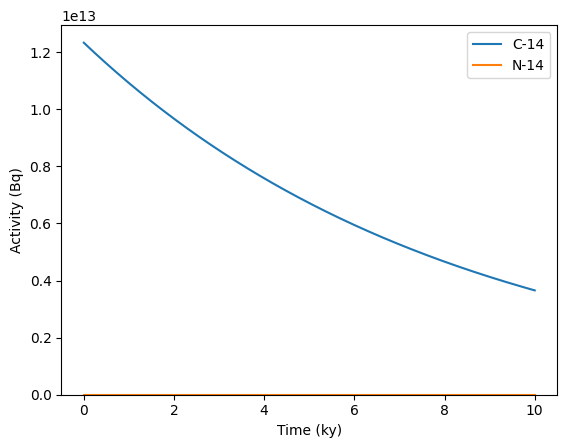

In [28]:
fig, ax = C14_t0.plot(10,'ky')

##  2.3 Molibdênio-99

$\quad$ A seguir, o bloco de código efetua uma simulação do decaimento radioativo do isótopo molibdênio-99 (Mo-99) utilizando a biblioteca `radioactivedecay`. Primeiramente, é criado um inventário que contem o Mo-99 como uma atividade inicial de 2 bq (becqueréis), que representa dois decaimentos por segundo. Em seguida, é efetuada uma simulação do decaimento desse inventário ao longo de 20 horas. Após esse intervalo de tempo, o código calcula e retorna a atividade dos isótopos presentes no inventário resultante, expressa em Bq.

$\quad$ Como o Mo-99 decai para tecnécio metastável (Tc-99m), o inventário final vai conter não apenas uma quantidade reduzida de Mo-99, mas também uma certa quantidade de Tc-99m acumulado. Assim, a chamada `activities('Bq')` fornece as atividades de ambos os isótopos após o decaimento, permitindo acompanhar a evolução da cadeia radioativa com precisão.

In [ ]:
Mo99_t0 = rd.Inventory({'Mo-99': 2.0}, 'Bq')
Mo99_t1 = Mo99_t0.decay(20.0, 'h')
Mo99_t1.activities('Bq')

{np.str_('Mo-99'): np.float64(1.6207863893776937),
 np.str_('Ru-99'): np.float64(0.0),
 np.str_('Tc-99'): np.float64(9.05304236308454e-09),
 np.str_('Tc-99m'): np.float64(1.3719829376710406)}

$\quad$ Com as informações já coletas e determinadas, a função `Mo99_t0.plot(20, 'd', yunits='Bq')` gera um gráfico que mostra a evolução do decaimento radioativo durante 20 dias.

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Time (d)', ylabel='Activity (Bq)'>)

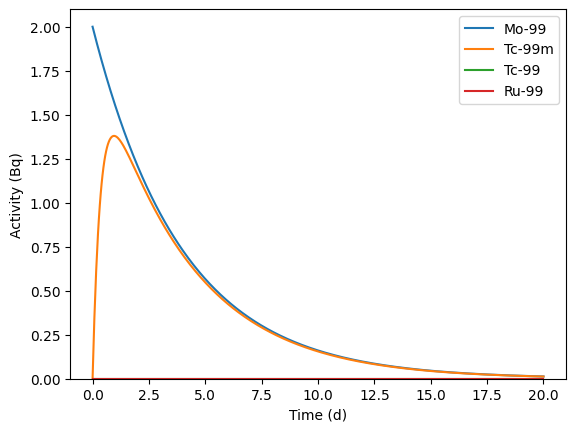

In [ ]:
Mo99_t0.plot(20, 'd', yunits='Bq')

$\quad$ O método `plot()` é aplicado ao inventário `Mo99_t0`, onde contém uma atividade inicial de 2.0 Bq de Mo-99.

$\quad$ O gráfico gerado mostra como a atividade do Mo-99 diminui com o tempo devido ao seu decaimento, e também como atividade do tecnécio-99m (Tc-99m), que é um produto direto desse decaimento, aumenta inicialmente e depois também decai. Isso permitiu visualizar a dinâmica temporal da cadeia de decaimento e quantificar a evolução da atividade de cada isótopo envolvido.

## 2.4. Urânio

$\quad$ A seguir, é efetuado, novamente, um diagrama de cadeia de decaimento, mas desta vez para o urânio-238 (U-238).

(<Figure size 450x4350 with 1 Axes>, <Axes: >)

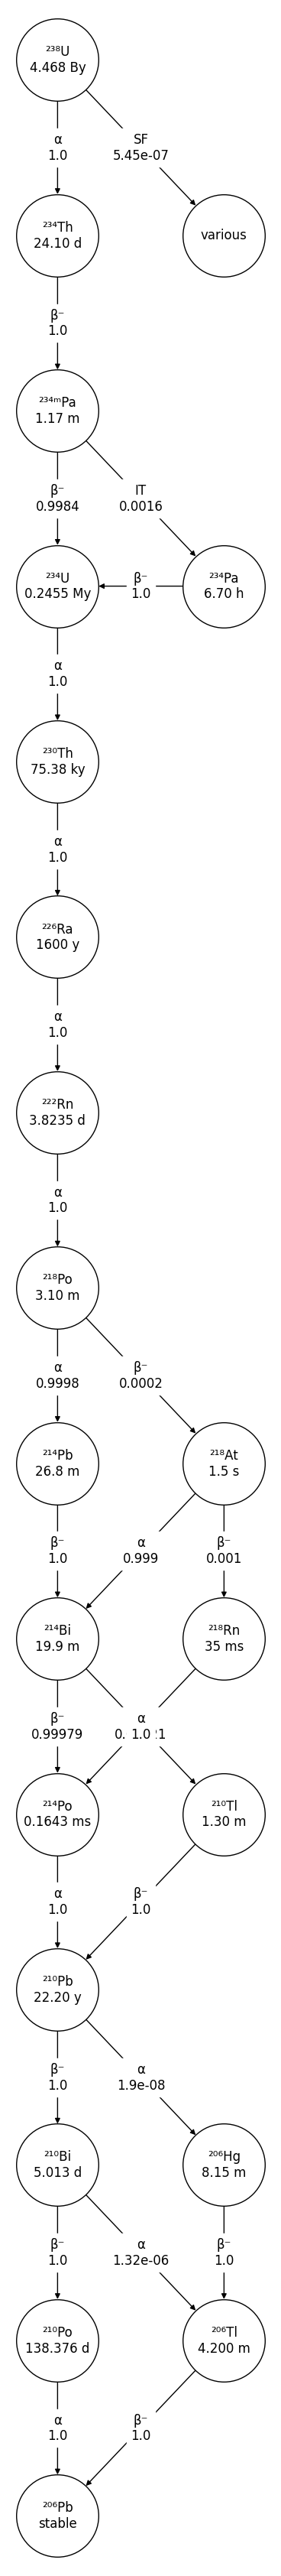

In [26]:
nuc_U = rd.Nuclide('U-238')
nuc_U.plot()

$\quad$ O código a seguir cria um inventário que contem três isotopos do urânio: U-238, U-235, U-234, com quantidades iniciais de 2000, 3000 e 1500 núcleos, respectivamente. A unidade usada para definir essas quantidades é o número de partículas (`num`).

$\quad$ Em seguida, o método `decay_time_series_pandas` é utilizado para calcular a evolução temporal dessas quantidades ao longo de um período de 1 bilhão de anos ($10^9 anos$). O resultado é um DataFrame do pandas que contém de cada isotopo em diferentes instantes ao longo desse intervalo, permitindo analisar o decaimento dos isótopos radioativos ao longo de um período geologicamente significativo.

$\quad$ Por fim, o comando `df.plot(ylabel='Number of Particles')` gera um gráfico que mostra a variação do número de núcleos de cada isotopo ao longo do tempo. O eixo vertical representa o número de partículas restantes, enquanto o eixo horizontal representa o tempo.

<Axes: xlabel='Time (y)', ylabel='Número de Particulas'>

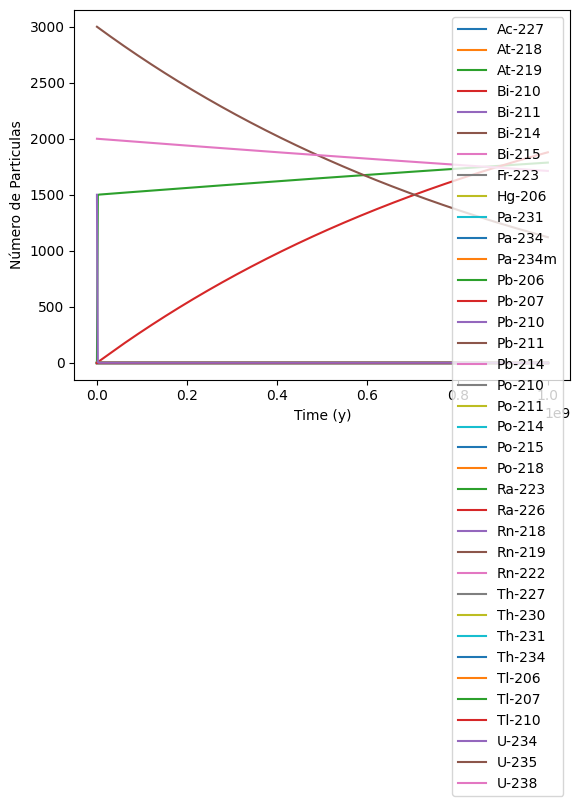

In [27]:
inv = rd.Inventory({'U-238': 2000.0, 'U-235': 3000.0, 'U-234': 1500.0}, 'num')
df = inv.decay_time_series_pandas(time_period=1E9, time_units='y', decay_units='num')
df.plot(ylabel='Número de Particulas')

$\quad$ Por fim, filtramos alguns elementos a fim de simplificar o gráfico.

<Axes: xlabel='Time (y)', ylabel='Número de Particulas'>

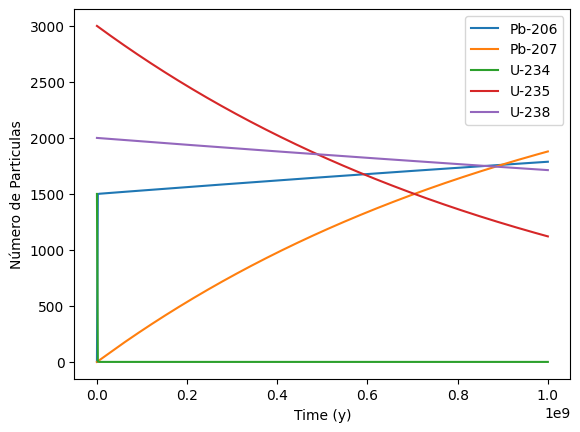

In [ ]:
filtered_df = df.loc[:, df.max() > 100]
filtered_df.plot(ylabel='Número de Particulas')

$\quad$ Esse código utiliza os dados obtidos anteriormente na simulação do decaimento dos isótopos de urânio. A variável `df` é um DataFrame que contém, para cada instante de tempo, a quantidade de partículas (núcleos) de diferentes isótopos presentes no inventário ao longo de 1 bilhão de anos.

$\quad$ A linha de código `filtered_df = df.loc[:, df.max() > 100]` filtra o DataFrame para manter apenas as colunas (ou seja, os isótopos) cuja quantidade máxima ao longo do tempo foi maior que 100 partículas. Isso serve para eliminar do gráfico isotopos que aparecem com quantidades muito pequenas, que poderiam dificultar a visualização ou poluir o gráfico com informações irrelevantes.

$\quad$ Logo depois, o comando `filtered_df.plot(ylabel='Número de Particulas')` gera um gráfico mostrando a evolução (isto é, aqueles que atingem mais de 100 núcleos em algum momento).

## 3. Conclusão

$\quad$ Neste `Notebook`, exploramos o conceito fundamental do decaimento radioativo por meio de simulações computacionais, utilizando a biblioteca `radioactivedecay` e o pacote `matplotlib` para análise e visualização dos processos. Inicialmente, abordamos a definição de probabilidade de decaimento relacionada à meia-vida dos isótopos, e implementamos modelos que simulam cadeias radioativas complexas, como a do Bismuto-213 e seus produtos.

$\quad$ As simulações demonstraram claramente a evolução temporal das populações nucleares, evidenciando os processos de transformação e geração de novos núcleos ao longo do tempo. A utilização do DataFrame do `pandas` para registrar séries temporais permitiu um acompanhamento detalhado da dinâmica de decaimento, enquanto os gráficos facilitaram a compreensão visual dos resultados.

$\quad$ Esses métodos são ferramentas poderosas para o estudo da radioatividade, fornecendo ferramentas quantitativas que complementam as abordagens teóricas.

$\quad$ Em suma, neste `Notebook`, o uso da combinação de teoria, simulação e visualização oferece um modo mais acessível e didático para entender o comportamento dos núcleos e suas cadeias de decaimento radioativo.

## 4. Referências

**[1]** ART_004_PET_2025 (1).PDF. Art_004_PET_2025 (1).pdf. Disponível em: <https://drive.google.com/file/d/1JbcEs89eRMTUa35LFLtcIlYVqNT8yvwf/view>.

‌**[2]** Theory and Computation — radioactivedecay 0.6.1 documentation. Disponível em: <https://radioactivedecay.github.io/theory.html>.

‌**[3]** M Amaku, PR Pascholati & VR Vanin, Comp. Phys. Comm. 181, 21-23 (2010). DOI: 10.1016/j.cpc.2009.08.011